In [1]:
#lagplot is the submodule of pandas.plotting
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import random as random




In [2]:
#Reading the excel files and loading to different data frames
df1=pd.read_excel(r"C:\Users\nvgsiva sai\Downloads\imputation_homework_91.xlsx")
df1.columns=["number","date","value"]
df1.drop('number',axis=1,inplace=True)
df1.head()

,date,value
0,2015-11-03,30.001248
1,2015-11-04,4.655104
2,2015-11-05,15.621201
3,2015-11-06,22.982759
4,2015-11-07,39.994644


In [3]:
#find the total nan values
df1.isnull().sum()

date      0
value    84
dtype: int64

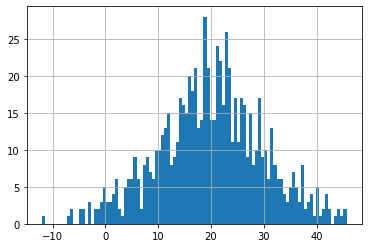

In [4]:
# PLotting the hostogram of the column which has null values 
_ = df1['value'].hist(bins=100)

To determine the time characteristics of the data, lag plot is used. Lag plot is only plotted on missing values. 
Since 'Value' Column has missing values, lag plot is plotted in value column

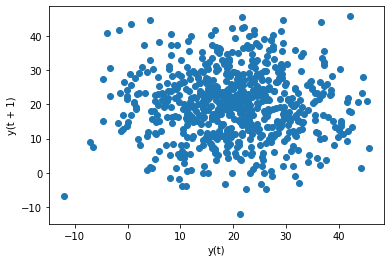

In [5]:
_ = lag_plot(df1['value'])

Clearly the above graph is random since it has not specific pattern. So, the missing data can be filled with sampling. 
Since the Nan values counts are too many, I am using the vales of the same column to fill the Nan values. 

The Nan values are not filled with the mean() values since the trend of graph sticks to mean as the Nan values are more. So,
the Nan values are radomly filled with the unique values of the same column which has Nan values. 

In [6]:
# The missing Nan values will be filled with the same column values. 
# The missing value column is copied to another data frame.
df1nonNanValues = df1['value'].copy()

In [7]:
# This data frame is replace wit hNULL vlaues if Nan values are present.
df1nonNanValues.fillna('NULL', inplace = True)

In [8]:
# All the unique values are extracted to a list. 
# Now, this list holds the unique values of data frame 3 of value column. But, this also inludes NUll (Nan) value.
uniqueValues = df1nonNanValues.unique().tolist()

In [9]:
# Since it is a list, NULL can be removed by remove() function. Now this list holds all the unique values.
uniqueValues.remove('NULL')

In [10]:
# This loop gets the cell value whith Nan values
# These cell values are replaced with random values of the same column
# The data frame is now replaced with the random values. 
# These random values are nothing but the unique values of the same column.
import sys
for i in range(df1.shape[0]):
       if df1['value'].isnull().iloc[i]:
        df1["value"][i] = random.choice(uniqueValues)

C:\Users\nvgsiva sai\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df1.isnull().sum()

date     0
value    0
dtype: int64

C:\Users\nvgsiva sai\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


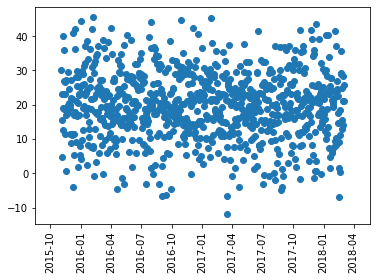

In [12]:
#plotting a scatter plot after sampling
_ = plt.scatter(x = df1['date'], y = df1['value'])
_ = plt.xticks(rotation='vertical')

In [13]:
df2=pd.read_excel(r"C:\Users\nvgsiva sai\Downloads\imputation_homework_29.xlsx")#loading the csv file
df2.columns=['number','x','y']
df2.drop('number',axis=1,inplace=True)#droping column number
df2.head()

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00


In [14]:
df2.isnull().sum()

x    9
y    0
dtype: int64

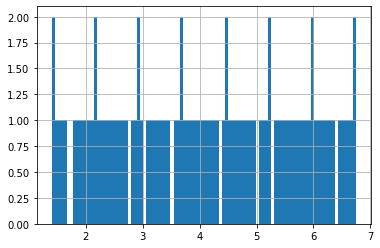

In [15]:
# Since only 'x' column has null values , histogram of x is plotted
_ = df2['x'].hist(bins = 100)

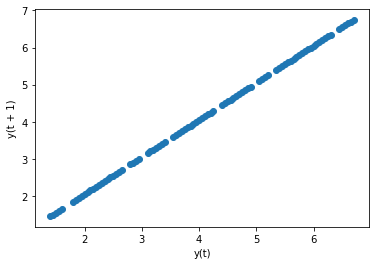

In [16]:
_=lag_plot(df2['x'])

Based on lagplot the order of the data does  matters

In [17]:
# The X column is now interpolated
# After this execution, there will be no nan values
df2['x'] = df2['x'].interpolate(method='linear', limit_direction='forward')

In [18]:
#there is no null values
df2.isnull().sum()

x    0
y    0
dtype: int64

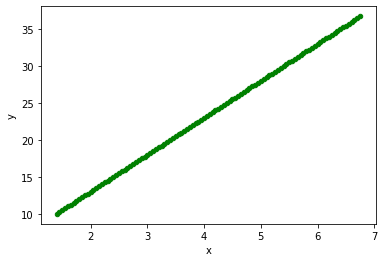

In [26]:
#plot after interpolation 
df2.plot.scatter('x','y',c='g')

In [27]:
df3=pd.read_excel(r"C:\Users\nvgsiva sai\Downloads\imputation_homework_04.xls")
df3.columns=['number','time','value']
df3.drop('number',axis=1,inplace=True)
df3.head()

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
time     500 non-null float64
value    450 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [29]:
df3.isnull().sum()

time      0
value    50
dtype: int64

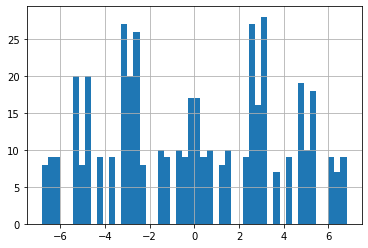

In [30]:
df3['value'].hist(bins=50)

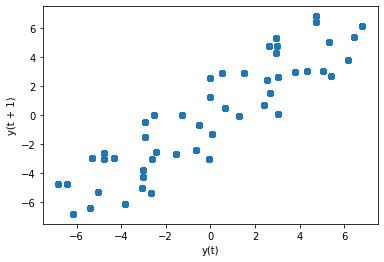

In [31]:
lag_plot(df3["value"])

Based on the lagplot order does matter

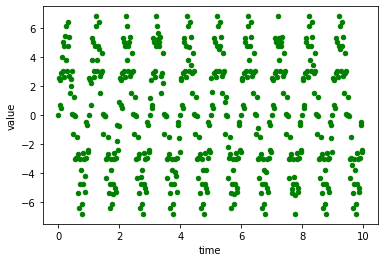

In [32]:
df3.interpolate(inplace=True)
df3.plot.scatter('time','value',c='g')

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
time     500 non-null float64
value    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB
